# Build ML model with cross-validation

* Cross-validation
* Logistic regression or Linear SVM model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import sensitivity_score, specificity_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('mldataset/featuresML.csv')

In [ ]:
data

,coh_nofilt_fp1_f3,coh_nofilt_fp1_fz,coh_nofilt_fp1_f4,coh_nofilt_fp1_f8,coh_nofilt_fp1_t3,coh_nofilt_fp1_c3,coh_nofilt_fp1_c4,coh_nofilt_fp1_t5,coh_nofilt_fp1_p3,coh_nofilt_fp1_pz,coh_nofilt_fp1_o1,coh_nofilt_fp1_o2,coh_nofilt_fp2_f7,coh_nofilt_fp2_f8,coh_nofilt_fp2_c3,coh_nofilt_fp2_c4,coh_nofilt_fp2_p3,coh_nofilt_fp2_pz,coh_nofilt_fp2_t6,coh_nofilt_f7_f3,coh_nofilt_f7_f8,coh_nofilt_f7_t3,coh_nofilt_f7_t5,coh_nofilt_f7_p3,coh_nofilt_f7_pz,coh_nofilt_f3_fz,coh_nofilt_f3_c3,coh_nofilt_f3_p3,coh_nofilt_f3_p4,coh_nofilt_fz_t3,coh_nofilt_fz_c3,coh_nofilt_fz_t4,coh_nofilt_f4_f8,coh_nofilt_f4_c3,coh_nofilt_f4_p3,coh_nofilt_f4_pz,coh_nofilt_f4_o2,coh_nofilt_f8_t4,coh_nofilt_f8_p3,coh_nofilt_f8_o2,...,psi_alpha_f4_f7,psi_alpha_f4_fz,psi_alpha_t3_fp1,psi_alpha_t3_f7,psi_alpha_t3_f3,psi_alpha_t3_fz,psi_alpha_c3_fp1,psi_alpha_c4_fp1,psi_alpha_c4_f3,psi_alpha_c4_fz,psi_alpha_c4_t3,psi_alpha_c4_c3,psi_alpha_t4_fp1,psi_alpha_t4_fz,psi_alpha_t5_fp1,psi_alpha_t5_f7,psi_alpha_t5_f3,psi_alpha_t5_f4,psi_alpha_t5_t3,psi_alpha_t5_c3,psi_alpha_p3_fp1,psi_alpha_p3_f7,psi_alpha_p3_fz,psi_alpha_p3_c3,psi_alpha_p3_c4,psi_alpha_p3_t4,psi_alpha_pz_fp1,psi_alpha_pz_t3,psi_alpha_pz_t4,psi_alpha_p4_fp1,psi_alpha_p4_f7,psi_alpha_t6_pz,psi_alpha_o1_fp1,psi_alpha_o1_f7,psi_alpha_o1_f3,psi_alpha_o1_fz,psi_alpha_o1_f8,psi_alpha_o1_c4,fn,target
0,0.857365,0.864015,0.795604,0.715263,0.611386,0.674974,0.672999,0.553537,0.616648,0.642582,0.553537,0.508631,0.669112,0.789668,0.549203,0.676465,0.545126,0.598601,0.549226,0.853866,0.627835,0.735782,0.615503,0.675887,0.654743,0.939459,0.849839,0.725109,0.580837,0.634176,0.802026,0.542755,0.851620,0.696892,0.632785,0.686606,0.606983,0.772885,0.535171,0.675112,...,-3.417466,-2.803661,-5.510947,-5.500178,-6.620121,-4.157351,-0.500163,-7.684637,-8.123422,-5.160129,-5.491852,-2.962551,-2.369364,-3.481203,-0.327797,-1.342953,-5.414614,1.574881,2.222428,1.288931,-0.274797,-2.486430,-0.239708,-0.278761,6.714114,7.842943,-2.092105,-0.560007,5.871869,-10.218885,-13.462491,-0.692398,3.679115,-2.268683,-1.759248,0.084458,7.790247,13.456649,00b2d6e257e2f615.csv,1
1,0.775378,0.657702,0.641092,0.713337,0.647718,0.536908,0.380917,0.506529,0.444137,0.421081,0.504800,0.614262,0.603511,0.739605,0.396774,0.387559,0.372892,0.462641,0.495298,0.732621,0.626817,0.740455,0.591746,0.518391,0.465850,0.717000,0.625465,0.436848,0.406268,0.408635,0.375001,0.436166,0.812375,0.343369,0.347343,0.362938,0.495749,0.735646,0.391638,0.628817,...,0.069399,3.553580,0.843658,-2.723047,1.265179,1.241487,0.542280,2.623896,1.618464,1.460858,-2.395320,-5.637482,5.927456,7.516790,0.193491,-3.449722,1.631684,-2.184413,-0.335957,-0.699405,0.688280,-2.586971,1.469035,-0.136107,3.673753,-2.748212,0.986620,-1.245509,-2.379689,1.816549,-3.144301,1.025139,0.329258,-3.629691,2.236469,2.965477,-1.694685,3.695031,09769097749fb286.csv,1
2,0.861601,0.828406,0.752612,0.744819,0.581250,0.791440,0.517047,0.560733,0.692334,0.616105,0.624289,0.572257,0.721113,0.810077,0.713608,0.532630,0.672897,0.608105,0.557992,0.792552,0.727363,0.684884,0.570241,0.659807,0.591307,0.864277,0.836848,0.678628,0.551160,0.506954,0.765414,0.488121,0.790806,0.638898,0.604674,0.572691,0.545722,0.722790,0.546985,0.580925,...,-0.490926,-1.394165,-2.305501,-1.032295,3.425428,-3.107383,4.706111,16.733979,15.666399,6.940796,-1.560097,-6.168924,12.741810,9.766904,4.547617,2.880675,6.610909,5.475021,0.788068,5.673682,3.425777,4.360725,6.680764,3.655152,-1.013193,0.433628,8.756281,4.337098,1.955977,2.457102,-2.969150,-2.867570,-0.259867,-0.771546,2.545654,2.913610,5.397551,-2.538582,0b84dd748e7d5edd.csv,1
3,0.833709,0.886321,0.793390,0.741746,0.808783,0.861057,0.766067,0.836142,0.825579,0.803499,0.808469,0.708771,0.749179,0.816098,0.749919,0.757034,0.748912,0.762546,0.768842,0.784969,0.751315,0.824584,0.824170,0.807401,0.797811,0.906903,0.866176,0.791949,0.700192,0.811706,0.878697,0.817122,0.809885,0.742102,0.757611,0.763925,0.750879,0.781487,0.727882,0.761595,...,4.012616,1.667477,-1.034823,0.931808,0.552738,-2

In [ ]:
X = data.drop(['fn','target'], axis=1)
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, stratify=y)

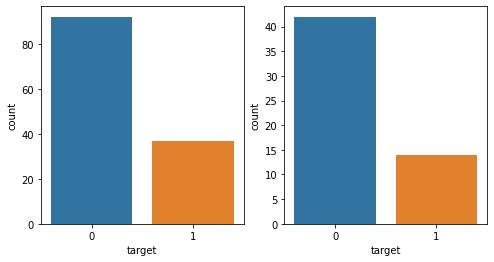

In [ ]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

In [ ]:
grid={'n_estimators':[10, 100, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],"class_weight":['none','balanced']}

rdf=RandomForestClassifier()

rdf_cv=GridSearchCV(rdf,grid,cv=10, n_jobs=-1)
rdf_cv.fit(X_train_sc,y_train)

print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
print("accuracy :",rdf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'log2', 'n_estimators': 100}
accuracy : 0.8455128205128204


In [ ]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=100, class_weight='balanced')
rdf.fit(X_train_sc, y_train)

y_pred_trainp = cross_val_predict(rdf, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(rdf, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(rdf, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(rdf, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(rdf, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test)

print('Confusion matrix for RFC')
confusion_matrix(y_test, y_pred) 

ROC_AUC score train:  0.8714747356051703
ROC_AUC score test:  0.8714747356051703
Sensitivity for train:  0.5135135135135135
Sensitivity for test:  0.5
Specificity for train:  0.9565217391304348
Specificity for test:  0.9761904761904762
Confusion matrix for RFC


array([[41,  1],
       [ 7,  7]])

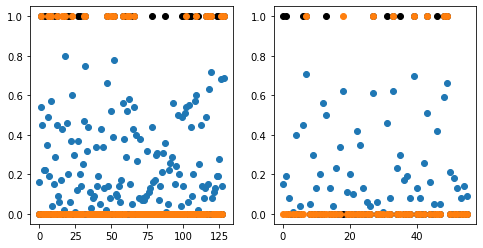

In [ ]:
fig, axs = plt.subplots(1,2, figsize=[8,4])

axs[0].plot(y_train.values, 'ko')
axs[0].plot(y_pred_trainp, 'o')
axs[0].plot(y_pred_train, 'o')

axs[1].plot(y_test.values, 'ko')
axs[1].plot(y_predp, 'o')
axs[1].plot(y_pred, 'o')

In [ ]:
gnb = GaussianNB().fit(X_train_sc, y_train) 

y_pred_trainp = cross_val_predict(gnb, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(gnb, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(gnb, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(gnb, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(gnb, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test) 

print('Confusion matrix for GNB')
confusion_matrix(y_test, y_pred)

ROC_AUC score train:  0.7710047003525264
ROC_AUC score test:  0.7710047003525264
Sensitivity for train:  0.7567567567567568
Sensitivity for test:  0.7857142857142857
Specificity for train:  0.6956521739130435
Specificity for test:  0.8571428571428571
Confusion matrix for GNB


array([[36,  6],
       [ 3, 11]])